# Analysis and Prediction of Factors Affecting Medical Charges

This project aims to gain insights into the factors that affects hospitalization and medical charges. The dataset was obtain from https://github.com/stedy/Machine-Learning-with-R-datasets.git (using insurance.csv)

This dataset contains the following features:


*   age : int, age of primary beneficiary
*   sex : binary, gender of the policy holder
*   bmi : int, body mass index which indicates whether the policy holder is underweight, normal weight or, overweight
*   children : int, indicates the number of childer/dependents covered by the policy
*   smoker : categorical, indicates if the policy holder is a smoker
*   region : categorical, place of the policy holder's residency.

And charges (INT) as the target



### Data Preprocessing

### 1. Import EDA libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Load CSV to DataFrame

In [ ]:
df = pd.read_csv('/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
#Display summary of the working DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


The dataset contains 6 features and 1 target. Out of 6 features, 3 are object datatype. There is no null entries

In [ ]:
#check for duplicates
df.duplicated().sum()

1

In [ ]:
#drop duplicates
df.drop_duplicates(inplace=True)

In [ ]:
#Overview of descriptive statistics
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


## 3. Explanatory Data Analysis

In this section, various plots will be shown to further analyze the relationship between the features and targets.

### 3.1 Demographics of the Dataset

The figure below contains 6 features showing the demographic of the datasheet, this includes the gender, age and the Body Mass Index or BMI.

<ipython-input-11-50a78886e040>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axs[0,1], data=df['smoker'], palette='Set2', alpha =0.9)


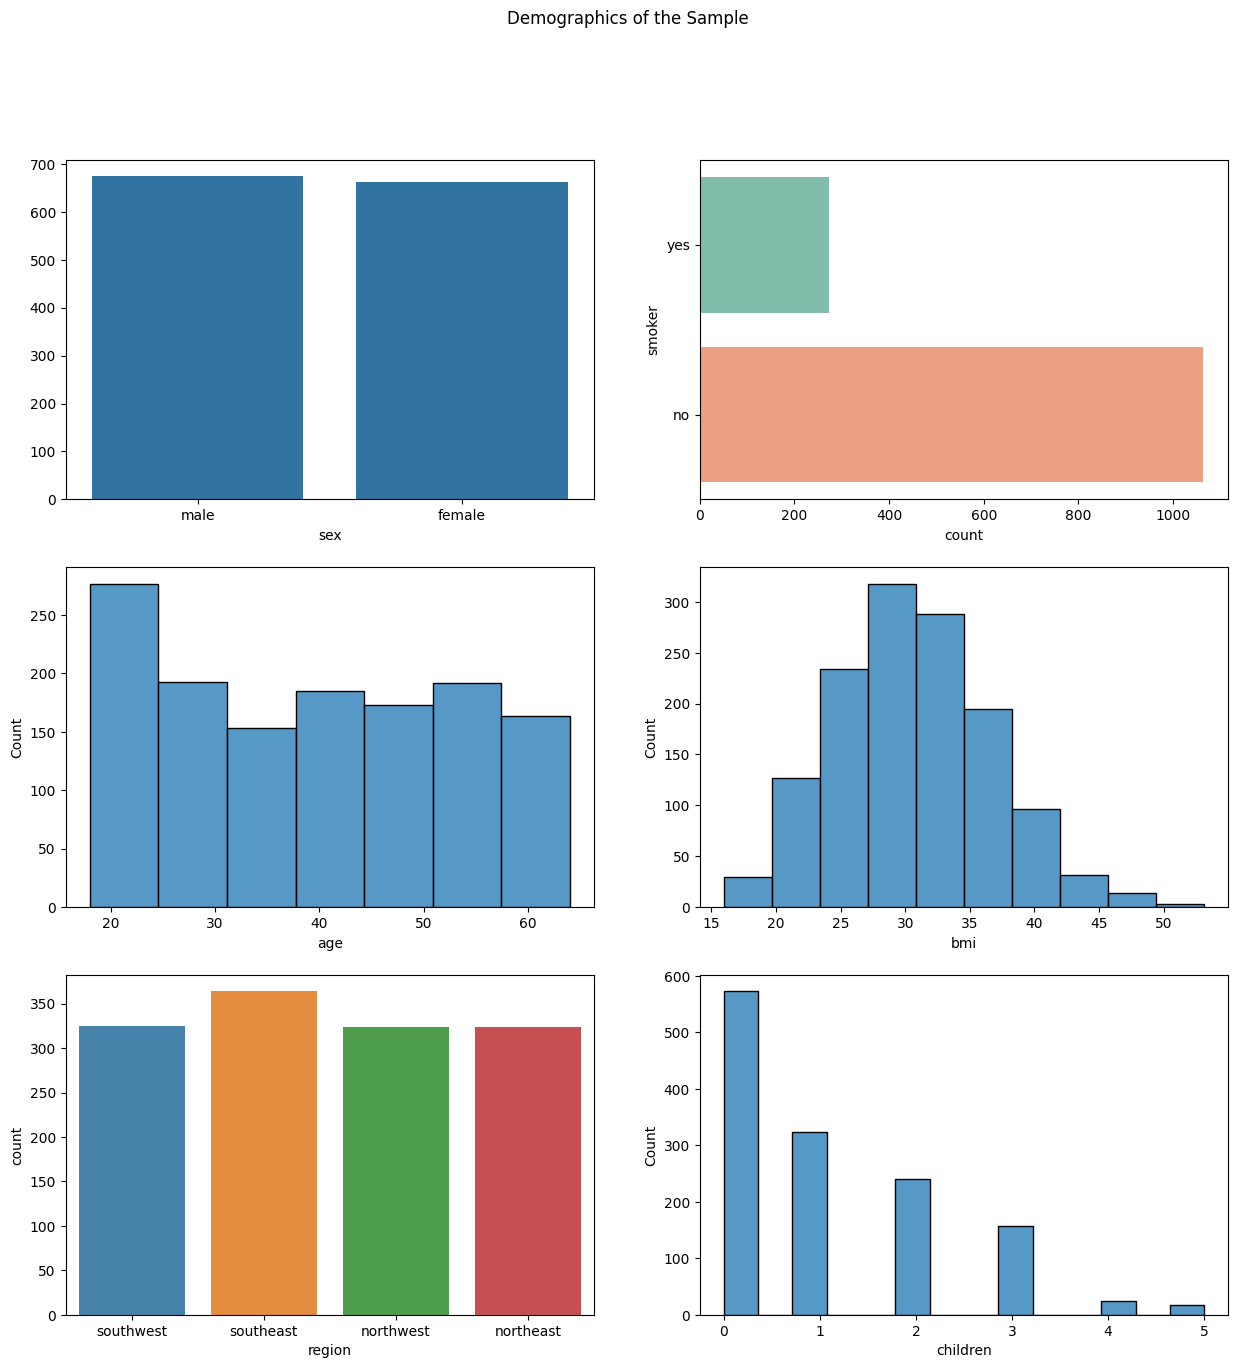

In [ ]:
#create subplots with 1 row and 2 columns
figure, axs = plt.subplots(3, 2, figsize=(15,15))

#Plot histograms
sns.barplot(ax=axs[0, 0], x=df['sex'].value_counts().index, y=df['sex'].value_counts().values)
sns.countplot(ax=axs[0,1], data=df['smoker'], palette='Set2', alpha =0.9)
sns.histplot(ax=axs[1,0], data=df['age'],bins=7)
sns.histplot(ax=axs[1,1], data=df['bmi'], bins= 10)
sns.countplot(ax=axs[2,0], data=df, x='region',hue='region', alpha =0.9)
sns.histplot(ax=axs[2,1], data=df, x='children')

figure.suptitle('Demographics of the Sample')
#show plot
plt.show()

### Distribution of Charges
The histogram shows the distribution of medical expenses from the dataset. The x-axis contains the expenses in dollars and the y-axis is the count of occurance.




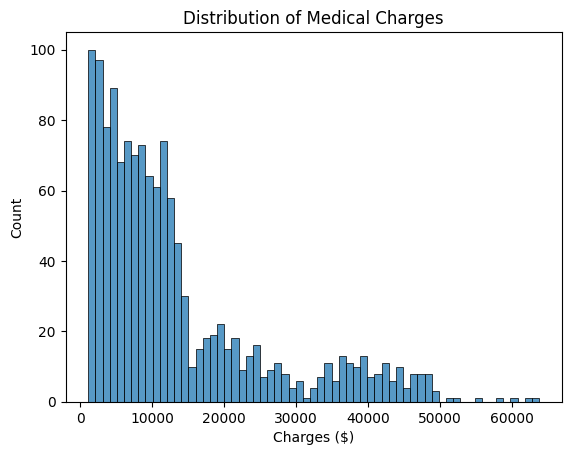

In [ ]:
#Histogram Plot of Medical Charges vs Count
sns.histplot(df.charges, binwidth=1000)
plt.title('Distribution of Medical Charges')
plt.xlabel('Charges ($)')
plt.show()

This output histogram shows the distribution of medical charges/expense, categorizing smokers(in orange) and non-smokers(blue) where x-axis is the medical expenses in dollars and y-axis is the count of the individual.

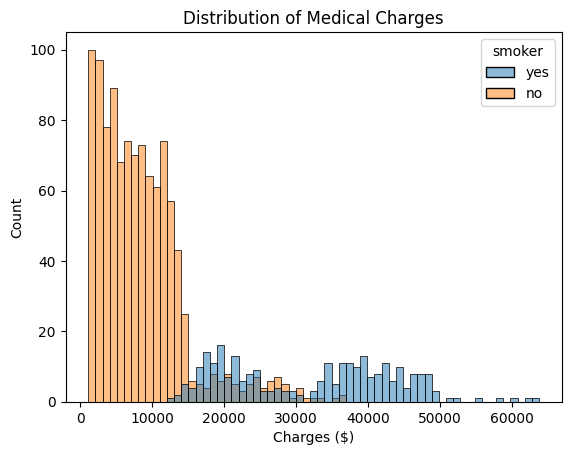

In [ ]:
sns.histplot(df, x='charges', binwidth=1000, hue='smoker')
plt.title('Distribution of Medical Charges')
plt.xlabel('Charges ($)')
plt.show()

The box plot displays the distribution of medical charges categorized by region and smoking status

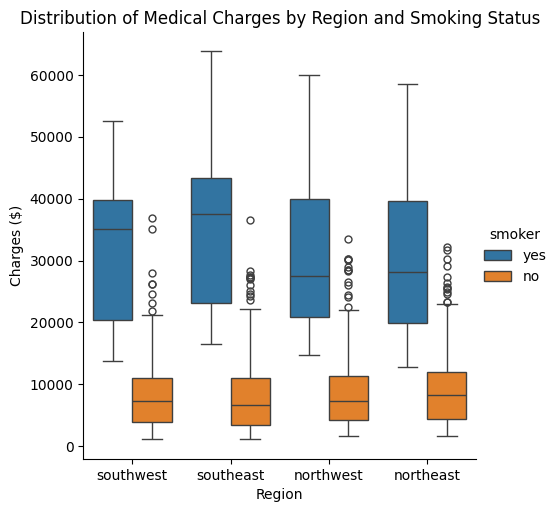

In [ ]:
sns.catplot(x='region', y='charges', hue='smoker', kind='box', data=df)
plt.title('Distribution of Medical Charges by Region and Smoking Status')
plt.xlabel('Region')
plt.ylabel('Charges ($)')
plt.show()

In [ ]:
#feature preparation for categorical feature using label encoding
from sklearn.preprocessing import LabelEncoder

categorical_features = ['sex', 'smoker', 'region']
label = LabelEncoder()

for cat_f in categorical_features:
    df[cat_f] = label.fit_transform(df[cat_f])

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


The heatmap presents the correlation between each pair of the features in the dataset. It shows a range of colors from blue to red, where blue indicates a negative correlation and red indicates a positive correlation. the darker the color, the stronger the correlation

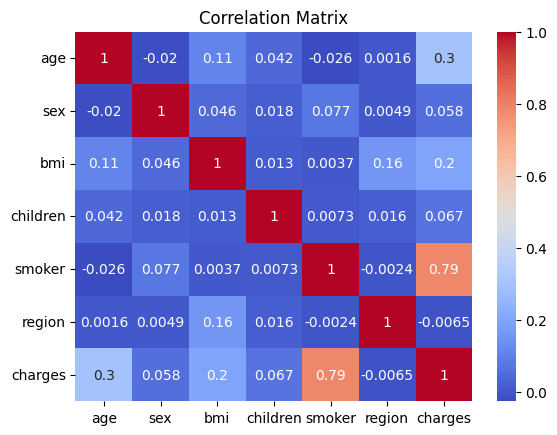

In [ ]:
#Correlation Matrix
corr = df_new.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

The linear regression plot shows the relationship between charges and age, grouped by smoking status. the plot includes two regression line, one for smokers (orange) and another one for non-smokers(blue)

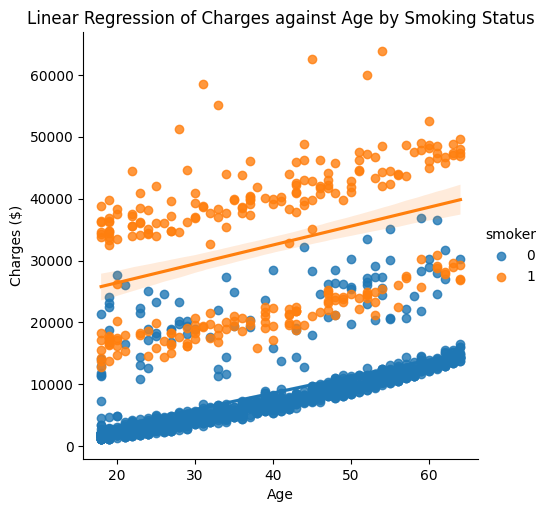

In [ ]:
##Linear Regression plot of charges againts age by smoking status
sns.lmplot(x='age', y='charges', hue='smoker', data=df)
plt.title('Linear Regression of Charges against Age by Smoking Status')
plt.xlabel("Age")
plt.ylabel('Charges ($)')
plt.show()

The linear regression plot shows the relationship between charges and BMI, with the data points grouped by smoker status. Similar to the previous plot, there are two regression lines, one for smokers (orange line) and one for non-smokers(blue line)

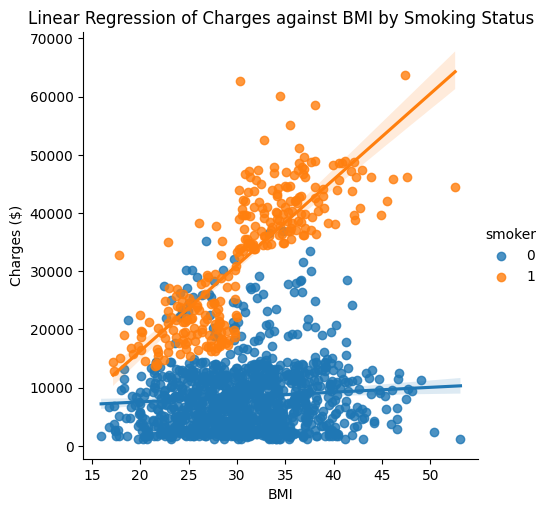

In [ ]:
#Linear Regression of Charges against BMI by Smoking Status
sns.lmplot(x='bmi', y='charges', hue='smoker', data=df)
plt.title("Linear Regression of Charges against BMI by Smoking Status")
plt.xlabel("BMI")
plt.ylabel("Charges ($)")
plt.show()

The heatmap shows the average charges by age and region. The horizontal axis represents the four regions (northeast, northwest, southeast and southwest) and the y-axis represents the age groups. the color intensity in the heatmap represents the average charges for a specific age group and region

In [ ]:
#categorizing age by their group
df['age_group'] = pd.cut(df['age'], bins=range(0, 70, 10),labels=['10-20','20-30','30-40','40-50','50-60','60-70'],right=False)

In [ ]:
## Group charges by age and region
age_region = df.groupby(['age_group', 'region'])['charges'].mean().reset_index()

<ipython-input-77-e04f6c692513>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_region = df.groupby(['age_group', 'region'])['charges'].mean().reset_index()


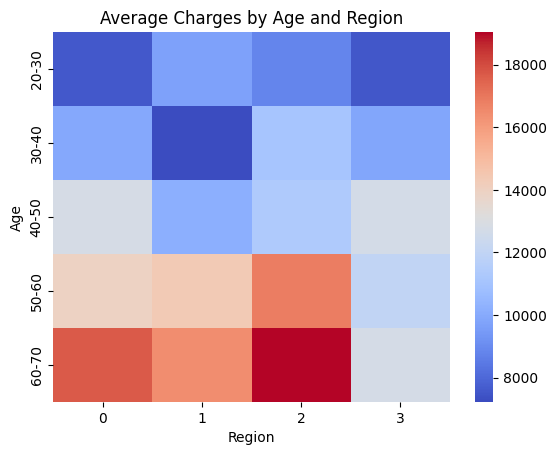

In [ ]:
# Pivot the table to visualize charges by age and region
age_region_pivot = age_region.pivot_table(index='age_group', columns='region', values='charges', aggfunc='mean')

# Plotting the heatmap
sns.heatmap(age_region_pivot, cmap='coolwarm')
plt.title("Average Charges by Age and Region")
plt.xlabel("Region")
plt.ylabel("Age")
plt.show()


Bar plot shows the average charges increase as the BMI increase

In [ ]:
#Categorizing BMI by their respective group
df['bmi_category']=pd.cut(df.bmi, bins =[0, 18.5, 25, 30, 35, 100], labels=['underweight','normal', 'overweight', 'obese', 'extremely obese'], right=True)

<ipython-input-80-289baa0086bc>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bmi_cat_charges = df.groupby('bmi_category')['charges'].mean().reset_index()


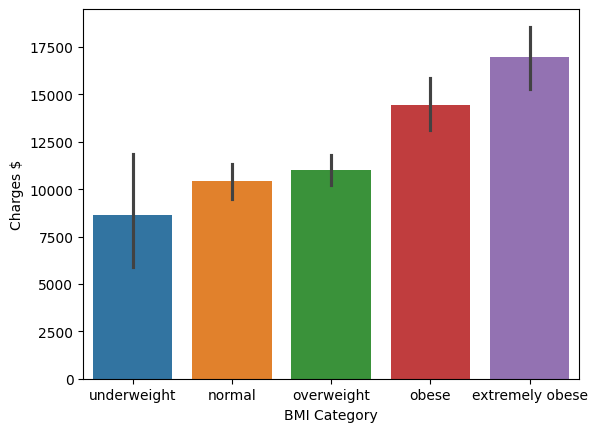

In [ ]:
bmi_cat_charges = df.groupby('bmi_category')['charges'].mean().reset_index()
sns.barplot(data=df, x='bmi_category', y='charges', hue='bmi_category')
plt.xlabel("BMI Category")
plt.ylabel("Charges $")
plt.show()

<ipython-input-81-9719823555bb>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  smoker_bmi_cat_charges = df.groupby(['smoker', 'bmi_category'])['charges'].mean().reset_index()


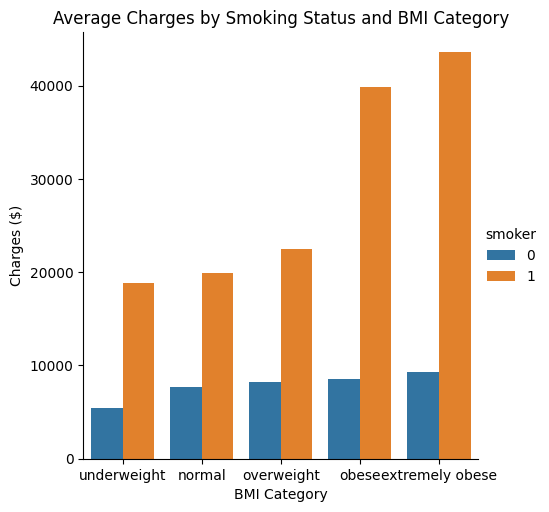

In [ ]:
## Calculate average charges by smoker status and BMI category
smoker_bmi_cat_charges = df.groupby(['smoker', 'bmi_category'])['charges'].mean().reset_index()
sns.catplot(x='bmi_category', y='charges', hue='smoker', kind='bar', data=smoker_bmi_cat_charges)
plt.title("Average Charges by Smoking Status and BMI Category")
plt.xlabel("BMI Category")
plt.ylabel("Charges ($)")
plt.show()

In [ ]:
#Final recommendations to clients


**Analysis of the Data:**

**Distribution and Countplot of the features**: The countplot of total number of smokers in the dataset tells us there is 25% smokers and 75% of non-smoker, this may lead to model bias once the machine learning model is  developed. While the other features sex, bmi,region of residence has a fairly good distribution, the feature 'age' and 'no. of children' are skewed to the right.



**Distribution of Charges:** The histogram shows the distribution of medical charges vs the number of occurance with that charge in the dataset. The histogram appears to be right-skewed, with a long tail to the right to be below 20,000 dollars with the highest frequency of charges around $10,000.


**Distribution of charges by smoker status.** The histogram shows the distribution of medical charges categorized by the smoking status. The plot is split into two sections orange plot distribution for non-smokers and blue plot histogram for smokers. The histogram shows a clear difference in the distibution of the charges. Smokers tends to have higher medical expense compare to non-smokers

**Distribution of charges by region and smoker status**. The output shows the distribution of medical charges by region ang smoking station.
Each box represents the interquartile range (IQR), ot middle 50% of the data, and the line within the box represent the median charge. The whiskers extend to the minimum and maximum values within 1.5 times the IQR, and any points beyond the whiskers are considered outliners.

From this plot. we can see that smoking status has a significant impact on the medical charges. with smokers having higher charges across all regions. Additionally, the charges vary by region, with southeast having the highest median charges and southwest having the lowest. However. the effect of the smoking status on charges seems to be consistent across all regions, with smokers consistently having higher charges than non-smokers.


**Correlation Matrix:** The heatmap show a range of colors from blue to red, where blue indicates a negative correlation and red indicates a positive correlation. The heatmap shows that age and BMI have positive correlation with the charge, this means that as the BMI and age increase, the medical charge increase as well.  Among the 6 features smoking status have the highest positive correlation, which suggest that smoking is a significant factor in determining medical charges.


**Linear Regression of Charges againts age and BMI:** For non-smokes as the age increase, there is a positive linear relationship with charges. This suggest that the older the non-smoker tend to have high medical charges compared to younger non-smokers. For smokers: the regression line has a steeper slope than that of non-smokers indecating that the impact of age on chargers is more signioficatn fot smokers. Smokers generally have higher charges compared to non-smokers across different age groups.

**Linear Regression of Charges agains BMI by smoking status:** For non-smokers the regression line shows that the relationship BMI and charges have weak link. This suggest that BMI alone may not strong enough predictor of charges for non-smokers. However, high BMI combined with smoking produces a steep regression line. This means that smoker with high BMI tends to pay more medical charges.

**Pivot table for age and region.** The heatmap shows the mean charges by age and region. the horizontal axis represents the four regions, and the vertical axis represents the age groups. The color intensity in the heatmap shows the average charges for age group and region combined. The highest average charges vary across regions. The age groups starting 50-60 is seen to be significant increase in medical expenses. Where as residents residing in southeast pays the most.


**Average charges by BMI:** The bar plot shows the increase of medical charges as the BMI increase. The extremely obese category have the highest ave. charges. BMI affects the charges positively regardless of age, smoking status, etc.

**Average charges by smoker status and BMI category:** The output shows the average medical charges for different BMI categories grouped by smoking status. The x-axis represents the BMI category, while the y-axis represents the average medical charges in dollars. The bars are colored according to smoking status, where blue represents non-smokers and orange represents smokers. The plot shows that for each BMI category, smokers have significantly higher average medical charges than non-smokers. Additionally, as the BMI category increases, the average medical charges increase as well, regardless of smoking status. The plot suggests that smoking and high BMI are both associated with higher medical charges, and the combination of the two leads to even higher charges.


This project analyzed the medical charges dataset to identify key factors influencing healthcare cost and provide recommendations for cost reduct and improved health outcomes. The key finds from data analysis are as follows:



*   Smoking Status: Smokers generally hae significantly higher medical charges compared to non-smokers. Encourraging smoking cessation programs can help reducer cost, imporve quality of life and improve health outcomes.
*  BMI and Obesity: There is a positive correlation between BMI(Body Mass Index) and Medical Charges. Promoting healthy lifestyles and exercise can reduce occurances of obesity.

*   Region: The dataset showed variations in medical charges across different Regions. Further analysis revealed that certain regions had higher charges compared to others. This suggests the need for targeted interventions and resource allocation based on regional healthcare patterns.
*   Age: The analysis found that age has a moderate correlation with medical charges. Older individuals tend to have higher charges, highlighting the importance of tailored healthcare services for aging populations.

**Based on these findings, the following recommendations are proposed:**

Encourage smoking cessation programs for high-risk populations, as smokers generally have higher medical charges.

Promote healthy lifestyles and preventive care measures to reduce the incidence of obesity, which is associated with higher medical charges.

Allocate resources and develop targeted interventions based on regional healthcare patterns to optimize healthcare delivery and cost efficiency.

Tailor healthcare services to the needs of aging populations, considering the higher medical charges associated with older individuals.

By implementing these recommendations, healthcare organizations, policymakers, and individuals can work towards reducing healthcare costs and improving health outcomes, ultimately benefiting both individuals and the healthcare system as a whole.






#Machine Learning Implementation


### Pre-processing and Train Split/Test

1.) It is necessary to transform the dataset into a format suitable for machine learning model. It ensures that the features are in a numerical format and includes all the importabnt features needed for analysis.

2.) Splitting data into a training set and testing dataset using train_test_split: 70% of the data will be the training dataset and 30% will be the testing dataset. Setting random_state to 42 for repeatable results.

In [ ]:
#importing sklearn modules for modelling

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import xgboost as xgb


In [ ]:
#separting the targets and features
X= df.drop(columns=['charges'])
y = df['charges']

print(X)
print(y)

      age  sex     bmi  children  smoker  region
0      19    0  27.900         0       1       3
1      18    1  33.770         1       0       2
2      28    1  33.000         3       0       2
3      33    1  22.705         0       0       1
4      32    1  28.880         0       0       1
...   ...  ...     ...       ...     ...     ...
1333   50    1  30.970         3       0       1
1334   18    0  31.920         0       0       0
1335   18    0  36.850         0       0       2
1336   21    0  25.800         0       0       3
1337   61    0  29.070         0       1       1

[1338 rows x 6 columns]
0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [ ]:
#perform train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42 )

NameError: name 'train_test_split' is not defined

### **Applying Machine Learning Models**

Pipeline: using pipeline will make the code cleaner and more reusable.

Random Forest and XGBoost are ensemble methods that handle correlated features well, and can model non-linear relationships effectively.

**USING RANDOM FOREST REGRESSOR**

In [ ]:
#setting-up the Pipeline with StandardScaler and using RandomForestRegressor as Machine Learning model
pipeline_RandomForest = Pipeline(steps= [('scaler', StandardScaler()),
                              ('randomforest', RandomForestRegressor(n_estimators=100))])
pipeline_RandomForest.fit(X_train, y_train)
y_pred = pipeline_RandomForest.predict(X_test)


r2_score_test = pipeline_RandomForest.score(X_test, y_test)
r2_score_train = pipeline_RandomForest.score(X_train, y_train)
print('Accuracy for test set for RandomForestRegressor = {}'.format(r2_score_test))
print('Accuracy for test set for RandomForestRegressor = {}'.format(r2_score_train))



Accuracy for test set for RandomForestRegressor = 0.8551308263283068
Accuracy for test set for RandomForestRegressor = 0.9755731929795896


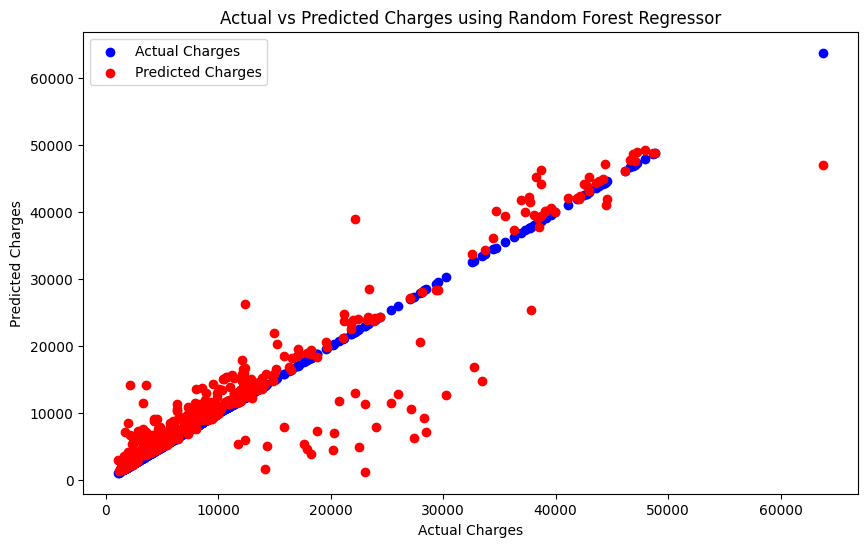

In [ ]:
#Scatter Plot on Actual Vs Predicted Charges (RandomForest Regressor)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test, color='blue', label='Actual Charges')
plt.scatter(y_test, y_pred, color='red', label='Predicted Charges')
plt.title('Actual vs Predicted Charges using Random Forest Regressor')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.legend()
plt.show()


**USING XGBOOST REGRESSOR**

In [ ]:
#setting-up the Pipeline with StandardScaler and using XGBoostRegressor as Machine Learning model
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.01, max_depth=3 )
pipeline_XGBoost = Pipeline(steps=[('scaler', StandardScaler()),('XGBoost', model)])
pipeline_XGBoost.fit(X_train, y_train)
y_pred = pipeline_XGBoost.predict(X_test)

r2_score_test = pipeline_XGBoost.score(X_test, y_test)
r2_score_train = pipeline_XGBoost.score(X_train, y_train)
print('Accuracy for test set for XGBRegressor = {}'.format(r2_score_test))
print('Accuracy for test set for XGBRegressor = {}'.format(r2_score_train))

Accuracy for test set for XGBRegressor = 0.7570438866890269
Accuracy for test set for XGBRegressor = 0.7404772981446047


The accuracy of XGBoost is lower compared to RandomForest Regressor by 13%.

Applying GridSearchCV may help to improve the model's accuracy by finding the parameters suitable for XGBoost

In [ ]:
from sklearn.model_selection import GridSearchCV



param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
}

grid_search = GridSearchCV(estimator=xgb.XGBRegressor(objective='reg:squarederror'), param_grid=param_grid, scoring='r2', cv=6)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)


Best parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}


In [ ]:
#setting-up the Pipeline with StandardScaler and using XGBoostRegressor with the new parameters
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=300, learning_rate=0.01, max_depth=3 )
pipeline_XGBoost = Pipeline(steps=[('scaler', StandardScaler()),('XGBoost', model)])
pipeline_XGBoost.fit(X_train, y_train)
y_pred = pipeline_XGBoost.predict(X_test)

r2_score_test = pipeline_XGBoost.score(X_test, y_test)
r2_score_train = pipeline_XGBoost.score(X_train, y_train)
print('Accuracy for test set for XGBRegressor = {}'.format(r2_score_test))
print('Accuracy for train set for XGBRegressor = {}'.format(r2_score_train))


Accuracy for test set for XGBRegressor = 0.8735798119475832
Accuracy for train set for XGBRegressor = 0.8696383325377818


With the Best Parameters selected using GridSearchCV the model's accuracy increased from 73.86% to 87.25%

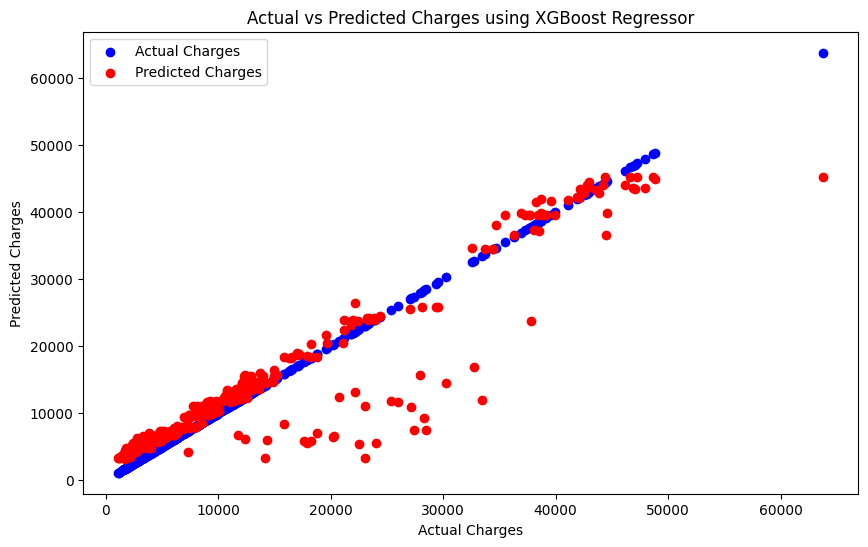

In [ ]:
#Scatter Plot on Actual Vs Predicted Charges (XGBoost Regressor)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test, color='blue', label='Actual Charges')
plt.scatter(y_test, y_pred, color='red', label='Predicted Charges')
plt.title('Actual vs Predicted Charges using XGBoost Regressor')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.legend()
plt.show()


Both RandomForest Regressor and XGBoost Regressor have above 0.7 R2 score, this indicates that the large portion of the variance is considered reliable.

To futher  investigate the model, f1-score will be used to evaluate the 2 models.



## COMPARING THE TWO REGRESSOR

Using f1-score shows the balance between the model's precision and recall.

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#using the train_test_split data and Pipeline created in the previous cells
#creating model list
models =[('RandomForest', pipeline_RandomForest), ('XGBoost', pipeline_XGBoost)]
results= []


#creating a summary report function

def regression_report(y_test, y_pred):
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)

    report = f"""
    Regression Report:
    ----------------------------
    R² Score        : {r2:.4f}
    Mean Absolute Error (MAE)  : {mae:.4f}
    Mean Squared Error (MSE)   : {mse:.4f}
    Root Mean Squared Error (RMSE) : {rmse:.4f}
    """
    print(report)

#initialize loop for the 2 regressor

for name, model in models:
  print(name)
  model.fit(X_train, y_train)
  score = model.score(X_test, y_test)
  y_pred= model.predict(X_test)
  regression_report(y_test, y_pred)




RandomForest

    Regression Report:
    ----------------------------
    R² Score        : 0.8574
    Mean Absolute Error (MAE)  : 2512.5388
    Mean Squared Error (MSE)   : 20911841.4675
    Root Mean Squared Error (RMSE) : 4572.9467
    
XGBoost

    Regression Report:
    ----------------------------
    R² Score        : 0.8736
    Mean Absolute Error (MAE)  : 2563.1036
    Mean Squared Error (MSE)   : 18536272.5770
    Root Mean Squared Error (RMSE) : 4305.3772
    


The RandomForest Regressor and XGBoost Regressor both perform well, with XGBoost slightly better than RandomForest. The RandomForest Regressor has an R² score of 0.8564, meaning it explains about 85.64% of the variance in the data. Its MAE is 2478.1572, and its RMSE is 4588.7305. In comparison, the XGBoost Regressor has a higher R² score of 0.8736, indicating it explains 87.36% of the variance. It has a MAE of 2563.1036 and a lower RMSE of 4305.3772. Overall, XGBoost shows a slightly better fit with lower error values compared to RandomForest.

In [ ]:
#import model_selection for cross fold validation
from sklearn import model_selection

result = []
names = []
scoring= 'r2'


#initialize for loop for cross-validation with 6 folds
for name, model in models:
  kfold = model_selection.KFold(n_splits= 6)
  cv_result = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
  result.append(cv_result)
  names.append(name)
  msg =  "%s: mean accuracy = %f, standard deviation accuracy = %f" % (name, cv_result.mean(), cv_result.std())
  print(msg)

RandomForest: mean accuracy = 0.838151, standard deviation accuracy = 0.028716
XGBoost: mean accuracy = 0.859933, standard deviation accuracy = 0.030975


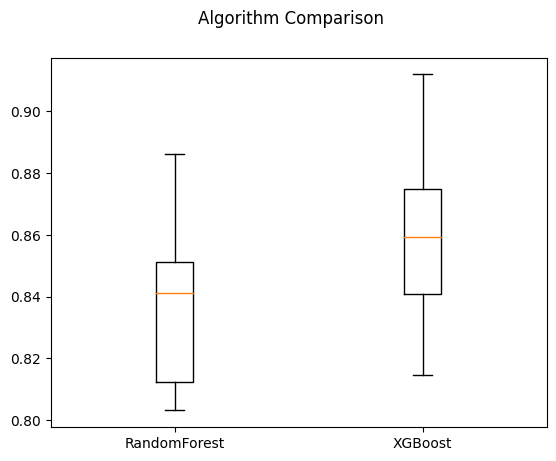

In [ ]:
# boxplot to compare the models
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(result)
ax.set_xticklabels(names)
plt.show()

# Conclusion and Recommendation:

This project uses RandomTree Regressor and XGBoost Regressor which are  good for right-skwed target. The 70% of the dataset was used for training and the remaining 30% is for testing dataset. Both algorithm performed very well in predicting especially after applying grid search for XGBoost parameters.


---



### Performance Comparison:
*   XGBoost performs better with a higher R² score (0.8736) compared to Random Forest (0.8574), making it more reliable in predicting the target variable.
*   XGBoost also has lower MSE and RMSE, indicating better predictive accuracy.
*   Random Forest has a slightly lower MAE, but XGBoost shows overall better performance.
*   Random Forest shows slightly better MAE but is less accurate and has higher error metrics compared to XGBoost.
*   Cross-validation, XGBoost demonstrates slightly higher accuracy but with more variability, while Random Forest shows slightly more consistent performance.


### Recommendation:
 Although our model have great predicting power. It could be improved by implementing better feature selection. Note that the dataset's target is highly skewed to the right with a long tail of high values. With this in mind, transforming the target using log-transform can be helpful.






---





---
**AUTHOR:**

Bianca Quizon